In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOOSS1S/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOOSS1S/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOOSS1S/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())
  
for s, l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())

In [ ]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<oov>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index # 

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequence = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequence, maxlen = max_length, truncating = trunc_type)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.SimpleRNN(128, activation = 'relu'),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
NUM_EPOCHS = 10

history = model.fit(padded, training_labels, validation_data=(testing_padded, testing_labels),
                    epochs=NUM_EPOCHS)

Epoch 1/5
782/782 [==============================] - 99s 126ms/step - loss: 0.2562 - accuracy: 0.9000 - val_loss: 0.5477 - val_accuracy: 0.7758
Epoch 2/5
782/782 [==============================] - 102s 130ms/step - loss: 0.2615 - accuracy: 0.8943 - val_loss: 0.5924 - val_accuracy: 0.7751
Epoch 3/5
782/782 [==============================] - 98s 126ms/step - loss: 0.2073 - accuracy: 0.9220 - val_loss: 0.6244 - val_accuracy: 0.7392
Epoch 4/5
782/782 [==============================] - 98s 126ms/step - loss: 0.3266 - accuracy: 0.8997 - val_loss: 0.6655 - val_accuracy: 0.7758
Epoch 5/5
782/782 [==============================] - 102s 130ms/step - loss: 0.6942 - accuracy: 0.9190 - val_loss: 0.6913 - val_accuracy: 0.6426


In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

실습 2

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete60C55E/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete60C55E/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete60C55E/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
# 데이터 확인 1
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
# 데이터 확인 2
for item in train_data:
    print(item)
    break

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [ ]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords[:10])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br']


In [ ]:
len(tokenizer.subwords)

7928

In [ ]:
# tokenizer 확인
string = "TensorFlow, from basics to mastery"

tokenized_string = tokenizer.encode(string)
print(tokenized_string)

original_string = tokenizer.decode(tokenized_string)
print(original_string)

[6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
TensorFlow, from basics to mastery


In [ ]:
for token in tokenized_string:
    print("{} -> {}".format(token, tokenizer.decode([token])))
# TensorFlow, basics, mastery라는 단어를 인식 못함 (어떤 단어가 나오느냐에 따라 다름)

6307 -> Ten
2327 -> sor
4043 -> Fl
2120 -> ow
2 -> , 
48 -> from 
4249 -> basi
4429 -> cs 
7 -> to 
2652 -> master
8050 -> y


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE) # BUFFER_SIZE 만큼 가져옴
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
tokenizer.vocab_size

8185

In [ ]:
embedding_dim = 64
max_length = 120
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, validation_data=test_dataset, epochs=NUM_EPOCHS)

Epoch 1/10
391/391 [==============================] - 18s 42ms/step - loss: 0.6192 - accuracy: 0.6580 - val_loss: 0.4649 - val_accuracy: 0.8126
Epoch 2/10
391/391 [==============================] - 17s 42ms/step - loss: 0.3505 - accuracy: 0.8713 - val_loss: 0.3681 - val_accuracy: 0.8332
Epoch 3/10
391/391 [==============================] - 17s 42ms/step - loss: 0.2614 - accuracy: 0.9021 - val_loss: 0.3086 - val_accuracy: 0.8777
Epoch 4/10
391/391 [==============================] - 17s 42ms/step - loss: 0.2187 - accuracy: 0.9203 - val_loss: 0.3049 - val_accuracy: 0.8812
Epoch 5/10
391/391 [==============================] - 17s 42ms/step - loss: 0.1961 - accuracy: 0.9277 - val_loss: 0.3100 - val_accuracy: 0.8808
Epoch 6/10
391/391 [==============================] - 17s 42ms/step - loss: 0.1699 - accuracy: 0.9402 - val_loss: 0.3315 - val_accuracy: 0.8732
Epoch 7/10
391/391 [==============================] - 17s 42ms/step - loss: 0.1556 - accuracy: 0.9452 - val_loss: 0.4317 - val_accuracy:

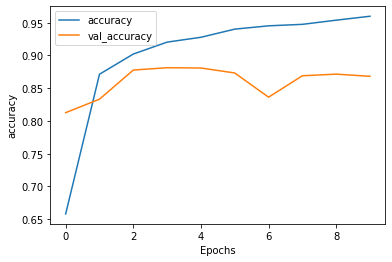

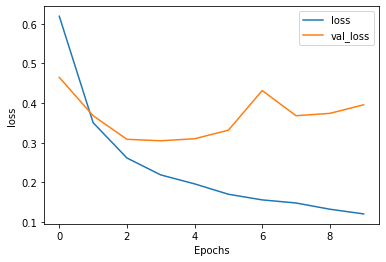

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
# LSTM
embedding_dim = 16
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, validation_data=test_dataset, epochs=NUM_EPOCHS)

Epoch 1/10
391/391 [==============================] - 430s 1s/step - loss: 0.6934 - accuracy: 0.4941 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
391/391 [==============================] - 424s 1s/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
391/391 [==============================] - 429s 1s/step - loss: 0.6950 - accuracy: 0.4953 - val_loss: 0.6929 - val_accuracy: 0.5025
Epoch 4/10
391/391 [==============================] - 432s 1s/step - loss: 0.6921 - accuracy: 0.5005 - val_loss: 0.6927 - val_accuracy: 0.5028
Epoch 5/10
391/391 [==============================] - 430s 1s/step - loss: 0.6904 - accuracy: 0.5064 - val_loss: 0.6933 - val_accuracy: 0.5011
Epoch 6/10
391/391 [==============================] - 430s 1s/step - loss: 0.6889 - accuracy: 0.5069 - val_loss: 0.6931 - val_accuracy: 0.5004
Epoch 7/10
391/391 [==============================] - 424s 1s/step - loss: 0.6875 - accuracy: 0.5046 - val_loss: 0.6940 - val_accuracy: 0.5034

In [ ]:
# Bidirectional
embedding_dim = 16
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, validation_data=test_dataset, epochs=NUM_EPOCHS)

In [ ]:
# stacking
embedding_dim = 16
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64), return_sequences=True), # stacking를 할 때마다 return_sequences=True로 해줌
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, validation_data=test_dataset, epochs=NUM_EPOCHS)

In [ ]:
# GRU + stacking
embedding_dim = 16
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64), return_sequences=True), # stacking를 할 때마다 return_sequences=True로 해줌
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

NUM_EPOCHS = 10

history = model.fit(train_dataset, validation_data=test_dataset, epochs=NUM_EPOCHS)